In [1]:
import pandas as pd
import numpy as np


In [2]:

df = pd.read_csv("C:\\Users\Ramya\OneDrive\Desktop\dataset.csv")

In [3]:
df.head(2)

,Zone,Facility Class,Facility Location,Facility Code,Facility,Status,Reservation Type,BeginTime,EndTime,Begin Date,End Date,Headcount
0,2013,BDEF,CARN,CAREF,Entire Facility,Firm,Facility,9:00:00 AM,12:30:00 PM,1/6/2013,1/6/2013,100
1,2013,BDMUL,CARN,HRTG,Heritage Room l,Firm,Facility,5:00:00 PM,11:00:00 PM,1/6/2013,1/6/2013,100


In [4]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler

# Load the dataset


# Preprocess the data
df = df[['Begin Date', 'Headcount']] # Select relevant features
df['Begin Date'] = pd.to_datetime(df['Begin Date']) # Convert Begin Date to datetime
df = df.groupby('Begin Date')['Headcount'].sum().reset_index() # Aggregate Headcount by date
df.set_index('Begin Date', inplace=True) # Set Begin Date as index

# Split the data into training and testing sets
#train_size = int(len(df) * 0.67)
#train_data = df.iloc[:train_size]
#test_data = df.iloc[train_size:]

# Split the data into training and testing sets
train_data = df.loc[:'2020-12-31']
test_data = df.loc['2021-01-01':]



In [5]:
train_data

,Headcount
Begin Date,
2013-01-01,20
2013-01-02,50
2013-01-03,57
2013-01-04,70
2013-01-05,360
...,...
2020-12-27,30
2020-12-28,0
2020-12-29,0


In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_data_scaled = scaler.fit_transform(train_data.values.reshape(-1, 1))
test_data_scaled = scaler.transform(test_data.values.reshape(-1, 1))

# Create sequences of data for LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    X = np.array(X)
    y = np.array(y)
    return X, y

seq_length = 100 # Number of time steps to look back
X_train, y_train = create_sequences(train_data_scaled, seq_length)
X_test, y_test = create_sequences(test_data_scaled, seq_length)

In [71]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)
print('Train loss:', train_loss)
print('Test loss:', test_loss)

Epoch 1/50
45/45 [==============================] - 17s 229ms/step - loss: 0.0043
Epoch 2/50
45/45 [==============================] - 9s 208ms/step - loss: 0.0042
Epoch 3/50
45/45 [==============================] - 10s 234ms/step - loss: 0.0042
Epoch 4/50
45/45 [==============================] - 8s 182ms/step - loss: 0.0042
Epoch 5/50
45/45 [==============================] - 9s 206ms/step - loss: 0.0043
Epoch 6/50
45/45 [==============================] - 9s 208ms/step - loss: 0.0042
Epoch 7/50
45/45 [==============================] - 8s 184ms/step - loss: 0.0042
Epoch 8/50
45/45 [==============================] - 9s 210ms/step - loss: 0.0046
Epoch 9/50
45/45 [==============================] - 10s 213ms/step - loss: 0.0046
Epoch 10/50
45/45 [==============================] - 10s 231ms/step - loss: 0.0042
Epoch 11/50
45/45 [==============================] - 8s 185ms/step - loss: 0.0042
Epoch 12/50
45/45 [==============================] - 9s 208ms/step - loss: 0.0041
Epoch 13/50
45/45 [==

20/20 [==============================] - 1s 44ms/step


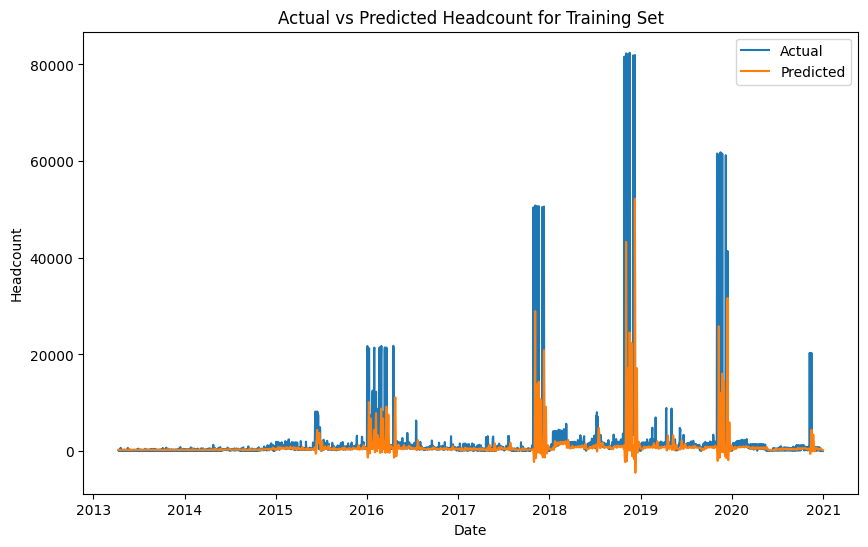

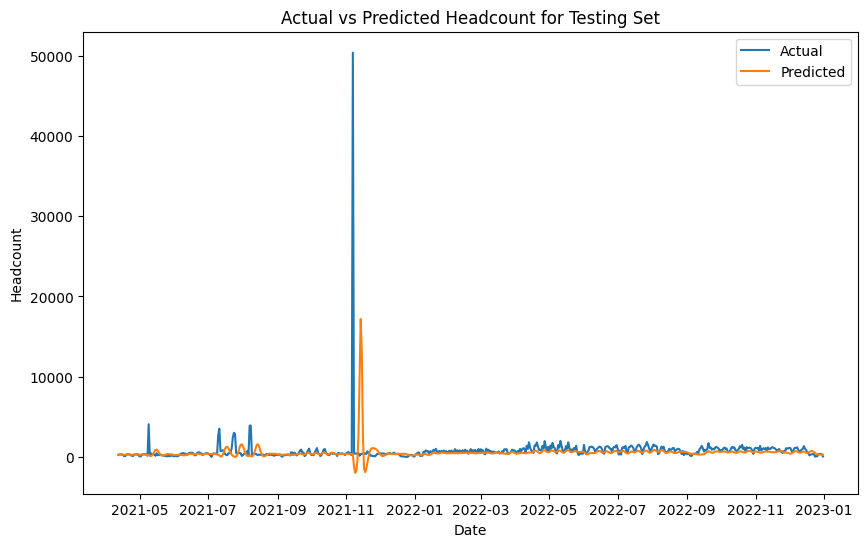

In [72]:
# Convert dates to datetime format
train_dates = pd.to_datetime(train_data.index)
test_dates = pd.to_datetime(test_data.index)

# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions back to original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Plot actual vs predicted values for training set
plt.figure(figsize=(10, 6))
plt.plot(train_dates[seq_length:], y_train[0], label='Actual')
plt.plot(train_dates[seq_length:], train_predict[:,0], label='Predicted')
plt.title('Actual vs Predicted Headcount for Training Set')
plt.xlabel('Date')
plt.ylabel('Headcount')
plt.legend()
plt.show()

# Plot actual vs predicted values for testing set
plt.figure(figsize=(10, 6))
plt.plot(test_dates[seq_length:], y_test[0], label='Actual')
plt.plot(test_dates[seq_length:], test_predict[:,0], label='Predicted')
plt.title('Actual vs Predicted Headcount for Testing Set')
plt.xlabel('Date')
plt.ylabel('Headcount')
plt.legend()
plt.show()


# demand

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\Ramya\OneDrive\Desktop\dataset.csv')

# Preprocess the data
df = df[['Facility Code', 'Begin Date', 'Headcount']] # Select relevant features
df['Begin Date'] = pd.to_datetime(df['Begin Date']) # Convert Begin Date to datetime

# Aggregate Headcount by Facility Code and Begin Date
df = df.groupby(['Facility Code', 'Begin Date'])['Headcount'].sum().reset_index()

# Add a new column to calculate total demand for each facility on each day
df['Total Demand'] = df.groupby(['Begin Date'])['Headcount'].transform('sum')

# Set Facility Code and Begin Date as index
df.set_index(['Facility Code', 'Begin Date'], inplace=True)

# Calculate the maximum demand for each facility on each day
max_demand = df.groupby(['Facility Code', 'Begin Date'])['Headcount'].max().reset_index()


In [9]:
max_demand

,Facility Code,Begin Date,Headcount
0,ART,2013-01-15,0
1,ART,2013-01-22,0
2,ART,2013-01-24,0
3,ART,2013-01-29,0
4,ART,2013-01-31,0
...,...,...,...
68042,WR,2014-12-03,0
68043,WR,2014-12-05,0
68044,WR,2014-12-08,0
68045,WR,2014-12-10,0


In [10]:

# Check if any days have demand that exceeds the capacity of a single facility
if max_demand['Headcount'].max() > 1:
    print('Demand cannot be accommodated by a single facility on some days')
    # Add an 'Exceed' column and set it to 0 for days where demand exceeds capacity
    max_demand.loc[max_demand['Headcount'] > 1, 'Exceed'] = 0
    # Set 'Exceed' to 1 for days where demand does not exceed capacity
    max_demand.loc[max_demand['Headcount'] <= 1, 'Exceed'] = 1
else:
    print('Demand can be accommodated by a single facility on all days')
    # Add an 'Exceed' column and set it to 1 for all days
    max_demand['Exceed'] = 1

Demand cannot be accommodated by a single facility on some days


In [11]:
# Display the resulting dataframe
print(max_demand.head())

  Facility Code Begin Date  Headcount  Exceed
0           ART 2013-01-15          0     1.0
1           ART 2013-01-22          0     1.0
2           ART 2013-01-24          0     1.0
3           ART 2013-01-29          0     1.0
4           ART 2013-01-31          0     1.0


In [12]:
# Calculate the percentage of days where demand exceeds capacity
exceed_pct = (max_demand['Exceed'] == 0).sum() / len(max_demand) * 100
print(f"Percentage of days where demand exceeds capacity: {exceed_pct:.2f}%")

Percentage of days where demand exceeds capacity: 56.33%


In [14]:
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\Ramya\OneDrive\Desktop\dataset.csv')

# Preprocess the data
df = df[['Facility Code', 'Begin Date']] # Select relevant features
df['Begin Date'] = pd.to_datetime(df['Begin Date']) # Convert Begin Date to datetime

# Add a new column to represent demand on each day
df['Demand'] = 1

# Drop duplicate bookings on the same day for the same facility
#df = df.drop_duplicates(subset=['Facility Code', 'Begin Date'], keep='first')

# Group by Begin Date and calculate total demand for each day
total_demand = df.groupby('Begin Date')['Demand'].sum().reset_index()

# Group by Facility Code and Begin Date, and calculate maximum demand for each day
max_demand = df.groupby(['Facility Code', 'Begin Date'])['Demand'].max().reset_index()

# Merge total demand with max demand to get a table of demand and capacity for each facility on each day
demand_vs_capacity = pd.merge(total_demand, max_demand, on='Begin Date')
demand_vs_capacity = demand_vs_capacity.rename(columns={'Demand': 'Total Demand', 'Facility Code': 'Facility'})

# Check if any days have demand that exceeds the capacity of a single facility
if max_demand['Demand'].max() > 1:
    print('Demand cannot be accommodated by a single facility on some days')
    # Add an 'Exceed' column and set it to 0 for days where demand exceeds capacity
    max_demand.loc[max_demand['Demand'] > 1, 'Exceed'] = 0
    # Set 'Exceed' to 1 for days where demand does not exceed capacity
    max_demand.loc[max_demand['Demand'] <= 1, 'Exceed'] = 1
else:
    print('Demand can be accommodated by a single facility on all days')
    # Add an 'Exceed' column and set it to 1 for all days
    max_demand['Exceed'] = 1

# Display the demand and capacity for each facility on each day, and whether demand exceeds capacity
demand_vs_capacity
print(max_demand)


Demand can be accommodated by a single facility on all days
      Facility Code Begin Date  Demand  Exceed
0               ART 2013-01-15       1       1
1               ART 2013-01-22       1       1
2               ART 2013-01-24       1       1
3               ART 2013-01-29       1       1
4               ART 2013-01-31       1       1
...             ...        ...     ...     ...
68042            WR 2014-12-03       1       1
68043            WR 2014-12-05       1       1
68044            WR 2014-12-08       1       1
68045            WR 2014-12-10       1       1
68046            WR 2014-12-12       1       1

[68047 rows x 4 columns]


In [15]:
demand_vs_capacity

,Begin Date,Demand_x,Facility,Demand_y
0,2013-01-01,1,ELGYM,1
1,2013-01-02,7,CBGYM,1
2,2013-01-02,7,CMRM,1
3,2013-01-02,7,ELGYM,1
4,2013-01-02,7,HPGYM,1
...,...,...,...,...
68042,2022-12-31,20,CRT1,1
68043,2022-12-31,20,EF,1
68044,2022-12-31,20,GYRM,1
68045,2022-12-31,20,HPCEF,1
